In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [42]:
#read the dataset and check the first five rows
loan_data = pd.read_csv("loan.csv", low_memory=False)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [43]:
#Check the shape of the dataframe
loan_data.shape

(39717, 111)

Data Handling and Cleaning

The first few steps involve making sure that there are no missing values or incorrect data types before we proceed to the analysis stage. These aforementioned problems are handled as follows:

    For Missing Values: Some common techniques to treat this issue are
        Dropping the rows containing the missing values
        Imputing the missing values
        Keep the missing values if they don't affect the analysis

    Incorrect Data Types:
        Clean certain values
        Clean and convert an entire column



In [44]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [45]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [46]:
# Removing columns those do not have data
loan_data = loan_data.dropna(axis=1, how='all')
loan_data.shape

(39717, 57)

In [47]:
# null values and values where only one type of value id available.        
for col in loan_data.columns:
    if (loan_data[col].value_counts().count() == 1) or (loan_data[col].isnull().mean()==1):
        loan_data.drop(col,axis=1,inplace=True)
        
# Removing columns those have 0 value more then 30%
drop_cols = loan_data.columns[(loan_data == 0).sum() > 0.30*loan_data.shape[1]]
loan_data.drop(drop_cols, axis = 1, inplace = True) 
loan_data.shape

(39717, 29)

In [48]:
# Checking the columns having less null percentage

loan_data.isnull().sum()/len(loan_data)*100

id                      0.000000
member_id               0.000000
loan_amnt               0.000000
funded_amnt             0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               6.191303
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
url                     0.000000
desc                   32.580507
purpose                 0.000000
title                   0.027696
zip_code                0.000000
addr_state              0.000000
earliest_cr_line        0.000000
open_acc                0.000000
revol_util              0.125891
total_acc               0.000000
last_pymnt_d            0.178765
next_pymnt_d           97.129693
last_credit_pull_d      0.005036
dtype: float64

 So, following columns have some null values. 
 <dl>
<dd>1) emp_title</dd>
<dd>2) emp_length</dd>
<dd>3) title</dd>
<dd>4) revol_util</dd>
<dd>5) last_pymnt_d</dd>    
</dl>

Lets try to fill them

In [49]:
# fill emp_title null values with others
loan_data.emp_title.fillna("Others", inplace = True)
loan_data.emp_title.isna().sum()

0

In [50]:
#fill emp_length with median
loan_data.emp_length.fillna(loan_data.emp_length.mean, inplace = True)
loan_data.emp_length.isna().sum()

0

In [51]:
# fill title null values with other
loan_data.title.fillna("Others", inplace = True)
loan_data.title.isna().sum()

0

In [52]:
# Convert revol_util to float data and fill na with median
loan_data.revol_util = loan_data.revol_util.str.slice(0, -1).map(lambda x :float(x))
loan_data.revol_util.fillna(loan_data.revol_util.mean, inplace = True)
loan_data.revol_util.isna().sum()

0

In [53]:
# Checking the columns having less null percentage

loan_data.isnull().sum()/len(loan_data)*100

id                      0.000000
member_id               0.000000
loan_amnt               0.000000
funded_amnt             0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.000000
emp_length              0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
url                     0.000000
desc                   32.580507
purpose                 0.000000
title                   0.000000
zip_code                0.000000
addr_state              0.000000
earliest_cr_line        0.000000
open_acc                0.000000
revol_util              0.000000
total_acc               0.000000
last_pymnt_d            0.178765
next_pymnt_d           97.129693
last_credit_pull_d      0.005036
dtype: float64

### Columns that cannot be analysed because of unstructed type of data

loan_data.title.describe() # too many unqiue values

loan_data.emp_title.describe()# too many unqiue values

loan_data.url.describe()# too many unqiue values

loan_data.zip_code.describe()# too many unqiue values

loan_data.application_type.describe()# only one type of value

loan_data.addr_state.describe()# only one type of value

loan_data.add.describe()# only one type of value

In [54]:
# We will remove unwanted columns from this dataset

unwanted=['url','zip_code','member_id','id','title']

loan_data.drop(labels=unwanted,axis=1,inplace=True)

Standardise Numbers
1. Non-standard units
Convert lbs to kgs, miles/hr to km/hr	Standardise the observations so all of them have the same consistent units
2. Values with varying Scales
 A column containing marks in subjects, with some subject marks out of 50 and others out of 100	Make the scale common. E.g. a percentage scale
3. Over-precision
 Standardise precision for better presentation of data. 4.5312341 kgs couldbe presented as 4.53 kgs
Remove outliers	Abnormally High and Low values	Correct if by mistake else Remove



In [56]:
# remove 'months' from term and convert to integer
loan_data.term = loan_data.term.apply(lambda x: int(x.split()[0]))

In [57]:
# remove % from int_rate and convert to float
loan_data.int_rate = loan_data.int_rate.apply(lambda x: float(x.replace('%','')))

In [58]:
# Convert revol_util to float
loan_data.revol_util = loan_data.revol_util.str.slice(0, -1).map(lambda x :float(x))

In [59]:
def emp_length_to_int(emp_length):
    emp_length = str(emp_length)
    arr = emp_length.split()
    if arr[0] == '<':
        return 0
    elif arr[0][-1] == '+':
        return 10
    else:
        print(arr[0])
        return int(arr[0])

In [60]:
# fill the na values
loan_data.emp_length = loan_data.emp_length.fillna("-1 years")

In [ ]:
# emp_length column convert to int
loan_data.emp_length = loan_data.emp_length.apply(emp_length_to_int)

In [62]:
#convert annual income to int
loan_data.annual_inc = loan_data.annual_inc.apply(lambda x : int(round(x,0)))
loan_data.annual_inc.value_counts()

60000     1505
50000     1058
40000      876
45000      830
30000      825
          ... 
35554        1
113316       1
64140        1
47748        1
213000       1
Name: annual_inc, Length: 5280, dtype: int64

Standardise Text
1. Extra characters
Common prefix/suffix, leading/trailing/multiple spaces	Remove the extra characters
2. Different cases of same words
Uppercase, lowercase, Title Case, Sentence case, etc	Standadise the case/bring to a common case
3.Non-standard formats
23/10/16 to 2016/10/20, “Modi, Narendra"" to “Narendra Modi""


In [63]:
loan_data.emp_title = loan_data.emp_title.apply(lambda x : x.lower())
loan_data.emp_title.value_counts()

others                        2459
us army                        210
bank of america                137
walmart                         81
at&t                            79
                              ... 
ambassador steel                 1
dell, inc                        1
attorney james golden, jr.       1
awi management corporation       1
leesman lighting                 1
Name: emp_title, Length: 27444, dtype: int64

In [172]:
#current data is not necessary for analysis
loan_data = loan_data[~ (loan_data["loan_status"]=="Current")]

Filter Data
1. Duplicate data
Identical rows, rows where some columns are identical	Deduplicate Data/ Remove duplicated data

2. Extra/Unnecessary  rows
Rows that are not required in the analysis. E.g if observations before or after a particular date only are required for analysis, other rows become unnecessary	Filter rows to keep only the relevant data.

3. Columns not relevant to analysis
Columns that are not needed for analysis e.g. Personal Detail columns such as Address, phone column in a dataset for 
Filter columns-Pick columns relevant to analysis

4. Dispersed data
Parts of data required for analysis stored in different files or part of different datasets	Bring the data together, Group by required keys, aggregate the rest


In [66]:
# long description in each row.
loan_data.drop("desc",axis=1,inplace=True)

## Univariate analysis with quantitative variables

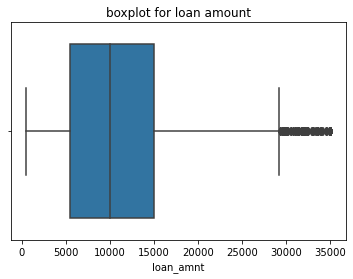

In [68]:
# range of loan amount
sns.boxplot(loan_data['loan_amnt'])
plt.title("boxplot for "+ "loan amount")
plt.show()


__Result:__
    1. The IQR lies between 5000-15000

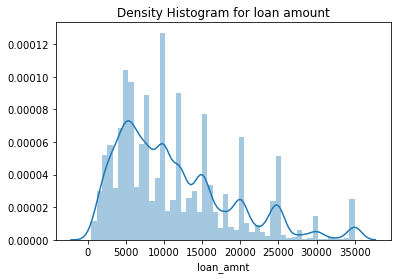

In [69]:
# values of loan amount
sns.distplot(loan_data['loan_amnt'])
plt.title("Density Histogram for loan amount")
plt.show()

__Result:__
    1. The histogram is elevated at 5000,10000, 15000, 20000, 250000

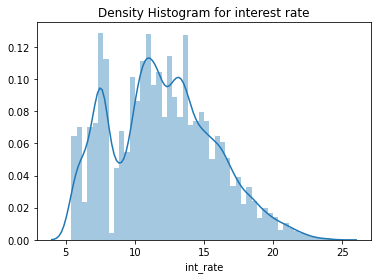

In [70]:
# values of interest rate
sns.distplot(loan_data['int_rate'])
plt.title("Density Histogram for interest rate")
plt.show()

count  -  39717.000000  
mean   -     12.021177  
std    -      3.724825  
min    -      5.420000  
25%    -      9.250000  
50%    -     11.860000  
75%    -     14.590000  
max    -     24.590000  

__Result:__
Average inerest rate is 12.1 and Median is 11.86

#### plotting the variation in annual income

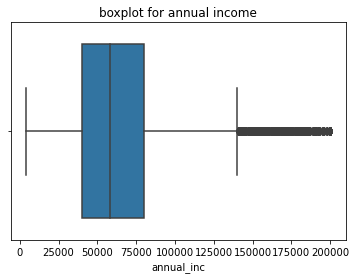

In [73]:
#checking the values above 9 lakh annual income
loan_data[(loan_data.annual_inc > 900000)].annual_inc.value_counts()

# removing outliers
loan_data = loan_data[~ (loan_data.annual_inc > 200000)]

# range of annual income
sns.boxplot(loan_data['annual_inc'])
plt.title("boxplot for annual income")
plt.show()

__Result:__
1. Most of the income lies between 40,000 to 80,000

## Univariate analysis with categorical variables

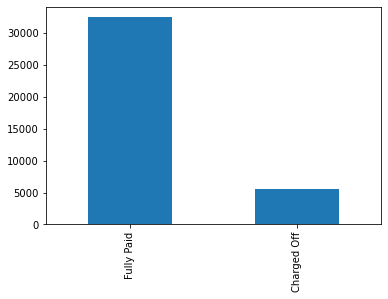

In [180]:
# loan status counts
loan_data['loan_status'].value_counts().plot.bar()
plt.show()

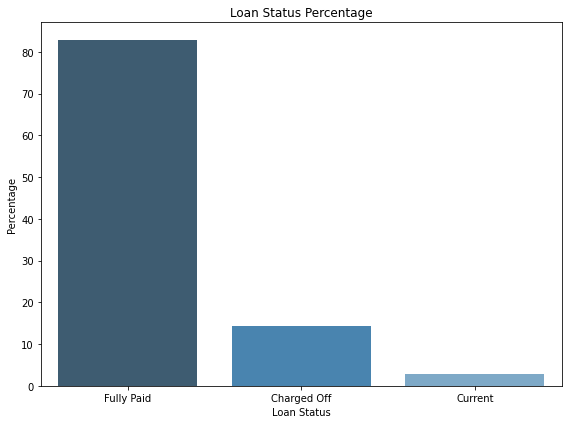

In [74]:
# loan status percentage
value_counts = loan_data['loan_status'].value_counts()
percentage_values = (value_counts / value_counts.sum()) * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_values.index, y=percentage_values, palette="Blues_d")
plt.title('Loan Status Percentage')
plt.xlabel('Loan Status')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

__Result:__
1. About 15% of the loans have defaulted

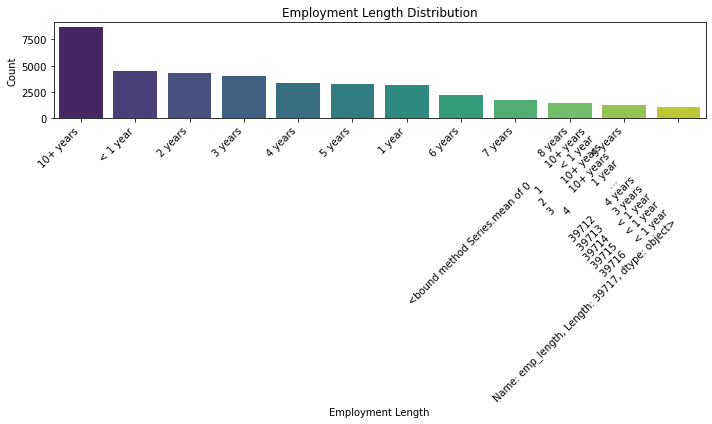

In [75]:
# distribution for empploment length
value_counts = loan_data['emp_length'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts, palette="viridis")
plt.title('Employment Length Distribution')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

__Result:__

1. Maximum loans are taken by people with 10+ years of employment



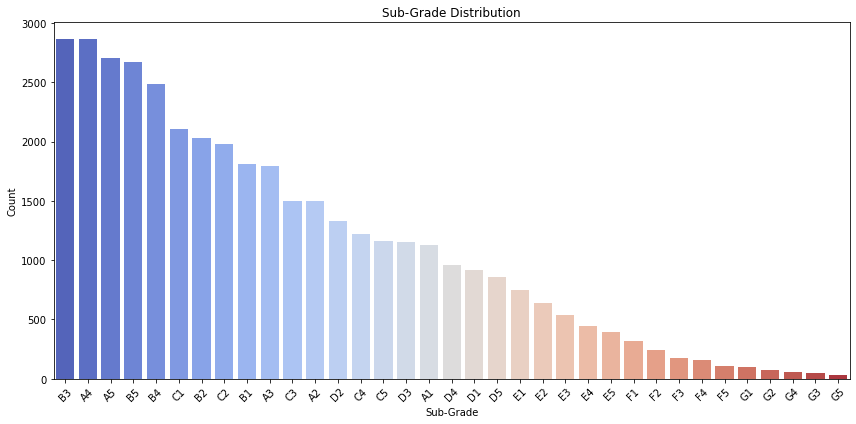

In [88]:
value_counts = loan_data['sub_grade'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=value_counts.index, y=value_counts, palette="coolwarm")
plt.title('Sub-Grade Distribution')
plt.xlabel('Sub-Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

__Result:__

1. B3 - A2 grades have maximum number of loans

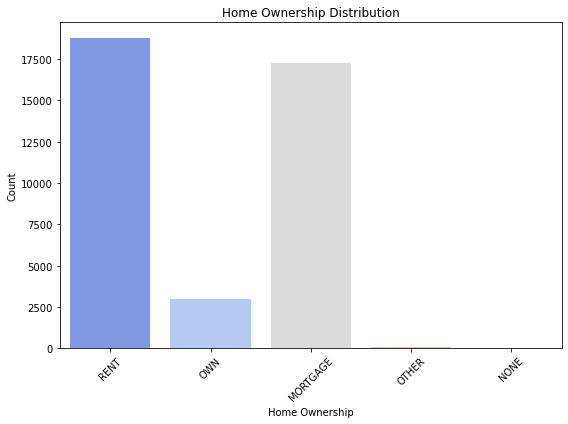

In [89]:
plt.figure(figsize=(8, 6))
sns.countplot(data=loan_data, x='home_ownership', palette='coolwarm')
plt.title('Home Ownership Distribution')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

__Result__:
1. People with rent and mortgage have greater loans

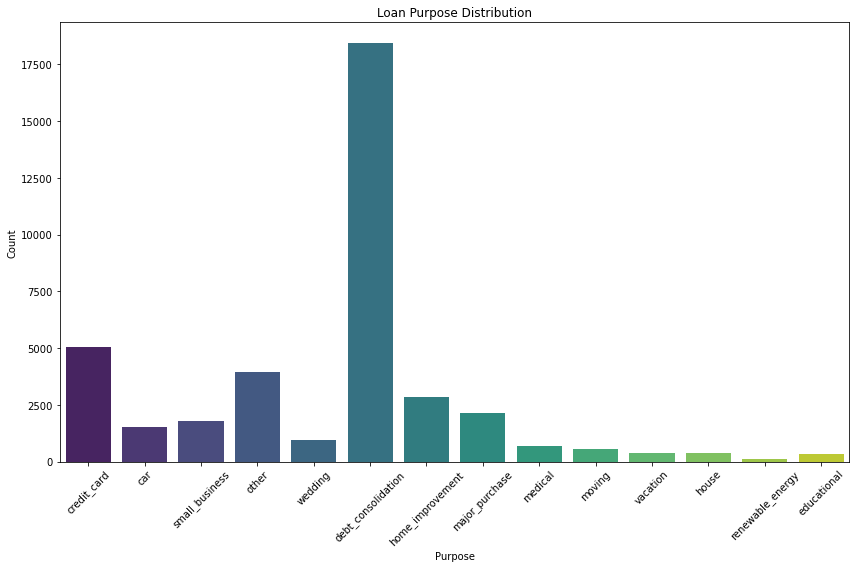

In [90]:
plt.figure(figsize=(12, 8))
sns.countplot(data=loan_data, x='purpose', palette='viridis')
plt.title('Loan Purpose Distribution')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

__Result__:
1. Maximum loans are taken for debt_consolidation

## Bivariate analysis with catagorical variables

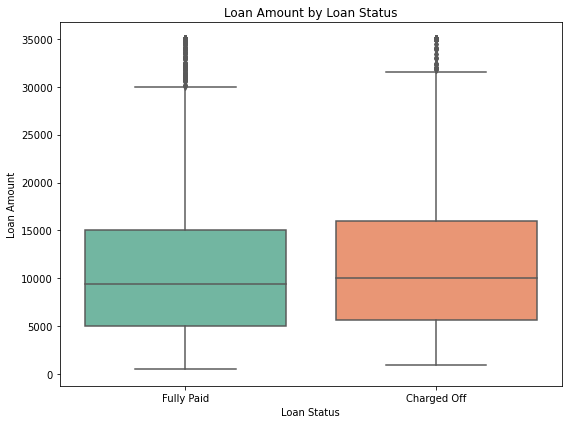

In [183]:
plt.figure(figsize=(8,6))
sns.boxplot(data=loan_data, x='loan_status', y='loan_amnt', palette='Set2')
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


__Result__:  
1.The difference between the box plot of the loans that have defaulted and are paid off is negligible. The 75th quartile of the "charged off" box plot is sl ightly higher than the "fully paid"

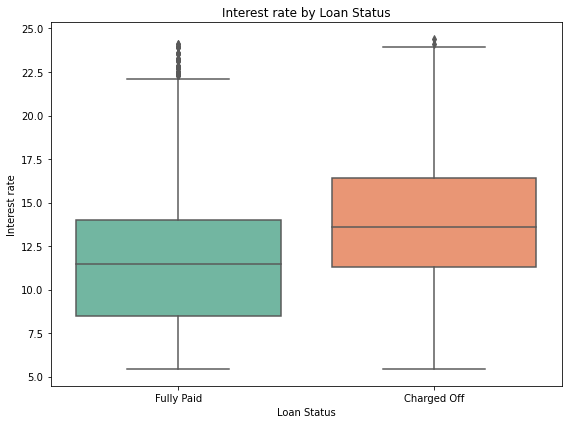

In [184]:
plt.figure(figsize=(8,6))
sns.boxplot(data=loan_data, x='loan_status', y='int_rate', palette='Set2')
plt.title('Interest rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

__Result__:  
1. The interest rate of the defaulters is at a higher range

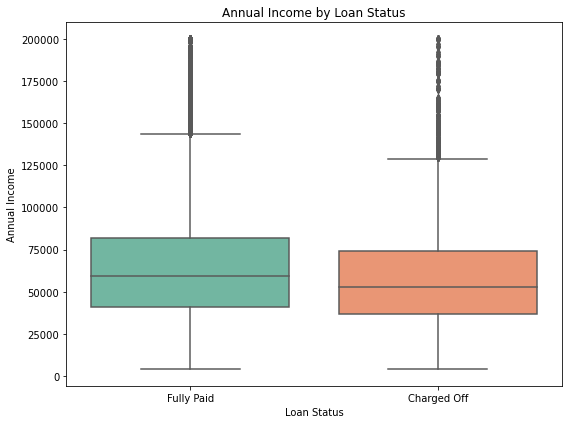

In [185]:
plt.figure(figsize=(8,6))
sns.boxplot(data=loan_data, x='loan_status', y='annual_inc', palette='Set2')
plt.title('Annual Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

__Result__:  
1. The borrowers with a slightly lower annual income range upto 75k have highger chance of loan getting defaulted

## Bivariate analysis with continuous variables

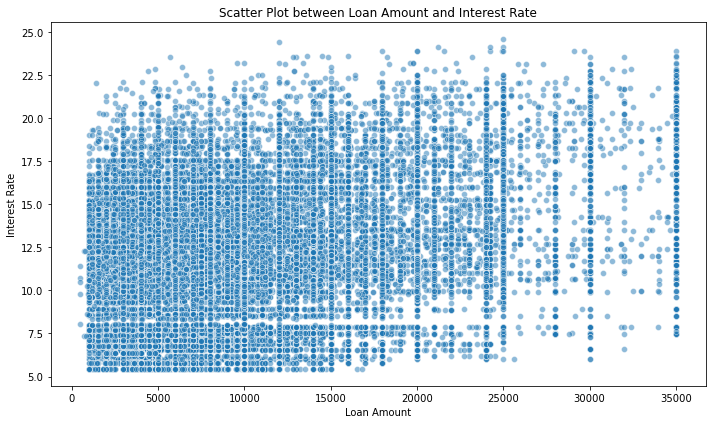

In [98]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_data, x='loan_amnt', y='int_rate', alpha=0.5)
plt.title('Scatter Plot between Loan Amount and Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.tight_layout()
plt.show()

__Result__:  
1. The interest rate of the defaulters is at a higher range

<ipython-input-78-76b6bbd03f73>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['loan_amnt_bins'] = pd.cut(loan_data['loan_amnt'], bins=bin_boundaries, right=False)


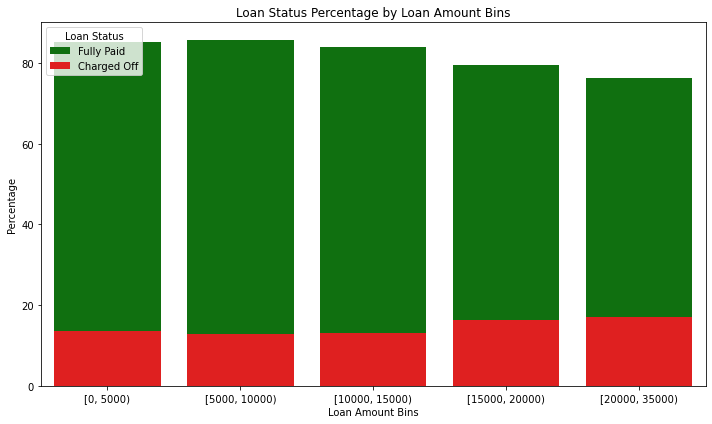

In [78]:
# Define the bin boundaries for loan_amnt
bin_boundaries = [0, 5000, 10000, 15000, 20000, 35000]

# Create bins for loan_amnt
loan_data['loan_amnt_bins'] = pd.cut(loan_data['loan_amnt'], bins=bin_boundaries, right=False)

# Calculate the percentage of loan_status counts within each bin
bin_percentages = (
    loan_data.groupby('loan_amnt_bins')['loan_status']
    .value_counts(normalize=True)
    .mul(100)
    .unstack(fill_value=0)
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(data=bin_percentages, x='loan_amnt_bins', y='Fully Paid', label='Fully Paid', color='green')
sns.barplot(data=bin_percentages, x='loan_amnt_bins', y='Charged Off', label='Charged Off', color='red')
plt.title('Loan Status Percentage by Loan Amount Bins')
plt.xlabel('Loan Amount Bins')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', loc='upper left')
plt.tight_layout()
plt.show()

__Result__:  
1. The percentage of defaulters is higher for loans between 15k-35k

<ipython-input-79-aea2e2c8e02c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['int_rate_bins'] = pd.cut(loan_data['int_rate'], bins=bin_boundaries, right=False)


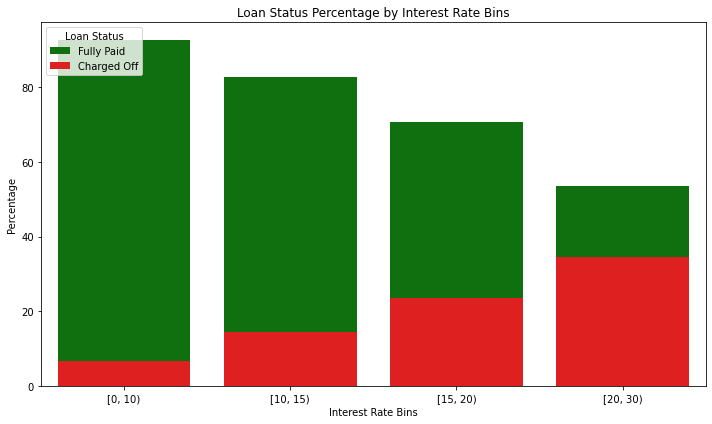

In [79]:
bin_boundaries = [0, 10, 15, 20, 30]

# Create bins for int_rate
loan_data['int_rate_bins'] = pd.cut(loan_data['int_rate'], bins=bin_boundaries, right=False)

# Calculate the percentage of loan_status counts within each bin
bin_percentages = (
    loan_data.groupby('int_rate_bins')['loan_status']
    .value_counts(normalize=True)
    .mul(100)
    .unstack(fill_value=0)
    .reset_index()
)
plt.figure(figsize=(10, 6))
sns.barplot(data=bin_percentages, x='int_rate_bins', y='Fully Paid', label='Fully Paid', color='green')
sns.barplot(data=bin_percentages, x='int_rate_bins', y='Charged Off', label='Charged Off', color='red')
plt.title('Loan Status Percentage by Interest Rate Bins')
plt.xlabel('Interest Rate Bins')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', loc='upper left')
plt.tight_layout()
plt.show()

__Result__:  
1. 40% of the borrowers whose interest rate was between 20 to 30% defaulted. Interest rate beyond 15% have higher change of defaulting

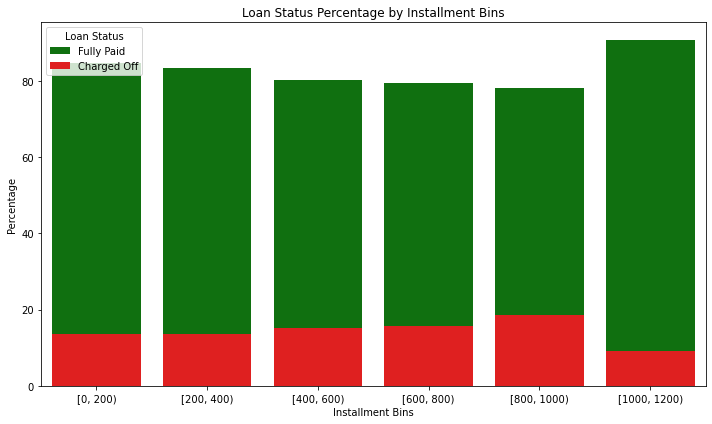

In [111]:
bin_boundaries = [0, 200, 400, 600, 800, 1000, 1200]

# Create bins for installment
loan_data['installment_bins'] = pd.cut(loan_data['installment'], bins=bin_boundaries, right=False)

# Calculate the percentage of loan_status counts within each bin
bin_percentages = (
    loan_data.groupby('installment_bins')['loan_status']
    .value_counts(normalize=True)
    .mul(100)
    .unstack(fill_value=0)
    .reset_index()
)
plt.figure(figsize=(10, 6))
sns.barplot(data=bin_percentages, x='installment_bins', y='Fully Paid', label='Fully Paid', color='green')
sns.barplot(data=bin_percentages, x='installment_bins', y='Charged Off', label='Charged Off', color='red')
plt.title('Loan Status Percentage by Installment Bins')
plt.xlabel('Installment Bins')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', loc='upper left')
plt.tight_layout()
plt.show()


__Result__:  
1. TThe percentage of defaulters is greater for installments between 800-1000

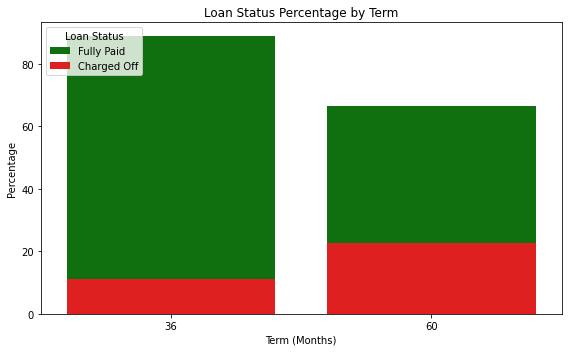

In [118]:

# Calculate the percentage of loan_status counts for each term category
term_percentages = (
    loan_data.groupby('term')['loan_status']
    .value_counts(normalize=True)
    .mul(100)
    .unstack(fill_value=0)
    .reset_index()
)


plt.figure(figsize=(8, 5))
sns.barplot(data=term_percentages, x='term', y='Fully Paid', label='Fully Paid', color='green')
sns.barplot(data=term_percentages, x='term', y='Charged Off', label='Charged Off', color='red')
plt.title('Loan Status Percentage by Term')
plt.xlabel('Term (Months)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', loc='upper left')
plt.tight_layout()
plt.show()


__Result__:  
1. Higher percentage of defaulters is present in the 60 months term

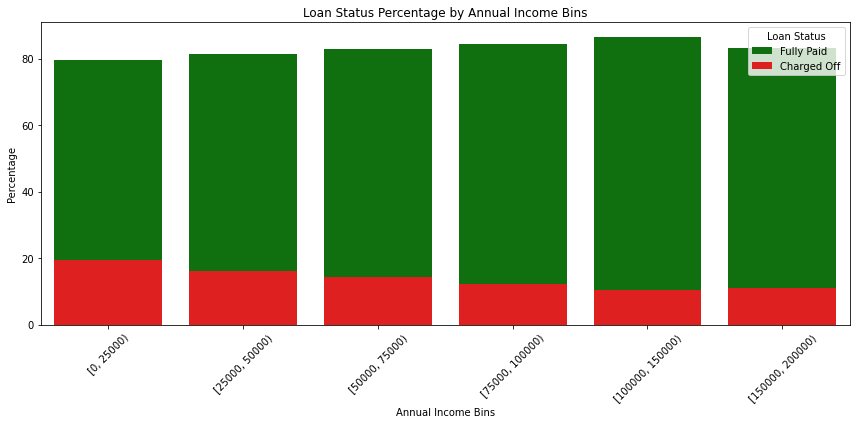

In [122]:
bin_boundaries = [0, 25000, 50000, 75000, 100000, 150000, 200000]

# Create bins for annual_inc
loan_data['annual_inc_bins'] = pd.cut(loan_data['annual_inc'], bins=bin_boundaries, right=False)

# Calculate the percentage of loan_status counts within each bin
bin_percentages = (
    loan_data.groupby('annual_inc_bins')['loan_status']
    .value_counts(normalize=True)
    .mul(100)
    .unstack(fill_value=0)
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(data=bin_percentages, x='annual_inc_bins', y='Fully Paid', label='Fully Paid', color='green')
sns.barplot(data=bin_percentages, x='annual_inc_bins', y='Charged Off', label='Charged Off', color='red')

plt.title('Loan Status Percentage by Annual Income Bins')
plt.xlabel('Annual Income Bins')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout()
plt.show()

__Result__:  
1. The percentage of defaulters gradually decreases with increase in annual income


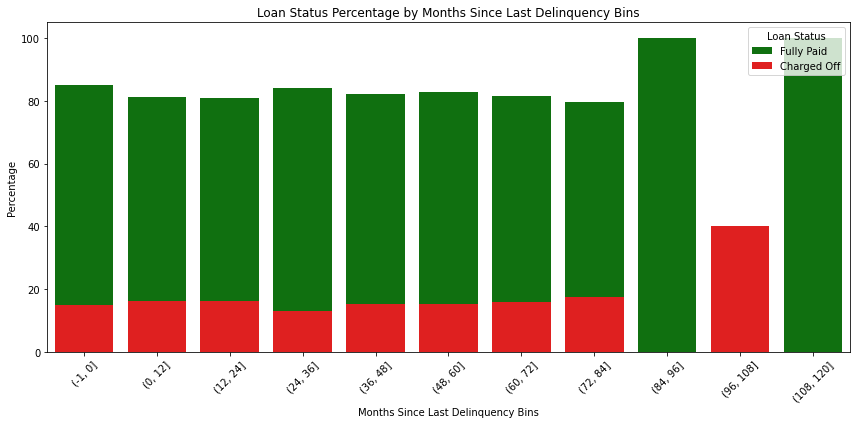

In [126]:
bin_boundaries = [-1, 0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120]

# Create bins for mths_since_last_delinq
loan_data['mths_since_last_delinq_bins'] = pd.cut(loan_data['mths_since_last_delinq'], bins=bin_boundaries, right=True)

# Calculate the percentage of loan_status counts within each bin
bin_percentages = (
    loan_data.groupby('mths_since_last_delinq_bins')['loan_status']
    .value_counts(normalize=True)
    .mul(100)
    .unstack(fill_value=0)
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(data=bin_percentages, x='mths_since_last_delinq_bins', y='Fully Paid', label='Fully Paid', color='green')
sns.barplot(data=bin_percentages, x='mths_since_last_delinq_bins', y='Charged Off', label='Charged Off', color='red')

plt.title('Loan Status Percentage by Months Since Last Delinquency Bins')
plt.xlabel('Months Since Last Delinquency Bins')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout()
plt.show()

__Result__:  
1. We can see a steep rise in defaulted percent for the range 96-108 months of crime

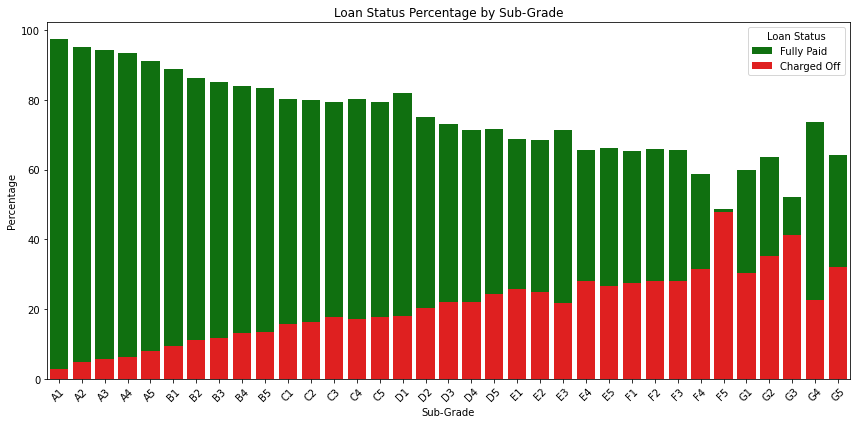

In [131]:
# Create a DataFrame with 'sub_grade' value counts
sub_grade_counts = loan_data['sub_grade'].value_counts().reset_index()
sub_grade_counts.columns = ['sub_grade', 'count']

# Calculate the percentage of loan_status counts for each sub-grade category
bivariate_data = loan_data.groupby(['sub_grade', 'loan_status']).size().unstack(fill_value=0)
bivariate_data = bivariate_data.div(bivariate_data.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))
sns.barplot(data=bivariate_data.reset_index(), x='sub_grade', y='Fully Paid', label='Fully Paid', color='green')
sns.barplot(data=bivariate_data.reset_index(), x='sub_grade', y='Charged Off', label='Charged Off', color='red')
plt.title('Loan Status Percentage by Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout()
plt.show()

__Result__:  
1. The higher percentage of defaulters are present in the higher grades

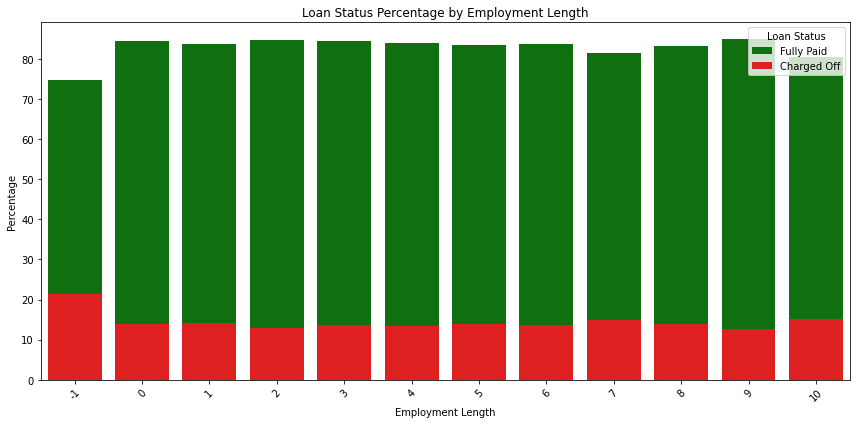

In [134]:
# Create a DataFrame with 'emp_length' value counts
emp_length_counts = loan_data['emp_length'].value_counts().reset_index()
emp_length_counts.columns = ['emp_length', 'count']

# Calculate the percentage of loan_status counts for each emp_length category
bivariate_data = loan_data.groupby(['emp_length', 'loan_status']).size().unstack(fill_value=0)
bivariate_data = bivariate_data.div(bivariate_data.sum(axis=1), axis=0) * 100


plt.figure(figsize=(12, 6))
sns.barplot(data=bivariate_data.reset_index(), x='emp_length', y='Fully Paid', label='Fully Paid', color='green')
sns.barplot(data=bivariate_data.reset_index(), x='emp_length', y='Charged Off', label='Charged Off', color='red')

plt.title('Loan Status Percentage by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout()
plt.show()


__Result__:  
1. There is negligible difference between the defaulting percentage compared to employement length

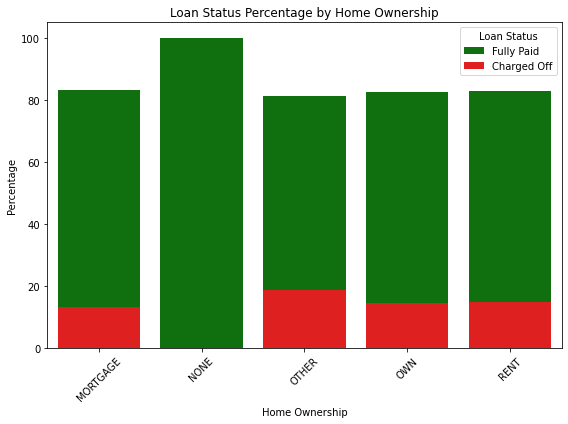

In [142]:
# Create a DataFrame with 'home_ownership' value counts
home_ownership_counts = loan_data['home_ownership'].value_counts().reset_index()
home_ownership_counts.columns = ['home_ownership', 'count']

bivariate_data = loan_data.groupby(['home_ownership', 'loan_status']).size().unstack(fill_value=0)
bivariate_data = bivariate_data.div(bivariate_data.sum(axis=1), axis=0) * 100


plt.figure(figsize=(8, 6))
sns.barplot(data=bivariate_data.reset_index(), x='home_ownership', y='Fully Paid', label='Fully Paid', color='green')
sns.barplot(data=bivariate_data.reset_index(), x='home_ownership', y='Charged Off', label='Charged Off', color='red')
plt.title('Loan Status Percentage by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout()
plt.show()

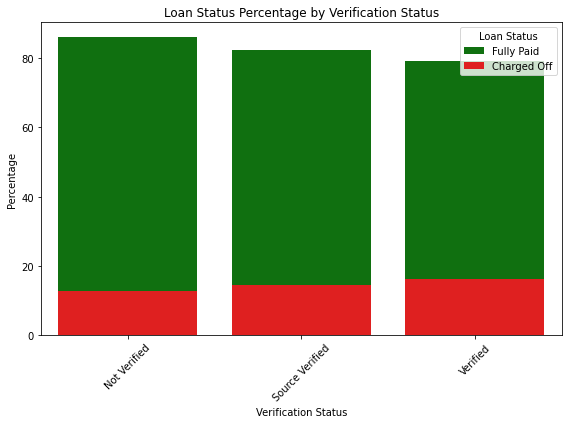

In [141]:
# Create a DataFrame with 'verification_status' value counts
verification_status_counts = loan_data['verification_status'].value_counts().reset_index()
verification_status_counts.columns = ['verification_status', 'count']

# Calculate the percentage of loan_status counts for each verification status category
bivariate_data = loan_data.groupby(['verification_status', 'loan_status']).size().unstack(fill_value=0)
bivariate_data = bivariate_data.div(bivariate_data.sum(axis=1), axis=0) * 100

# Create a Seaborn bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=bivariate_data.reset_index(), x='verification_status', y='Fully Paid', label='Fully Paid', color='green')
sns.barplot(data=bivariate_data.reset_index(), x='verification_status', y='Charged Off', label='Charged Off', color='red')
plt.title('Loan Status Percentage by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout()
plt.show()

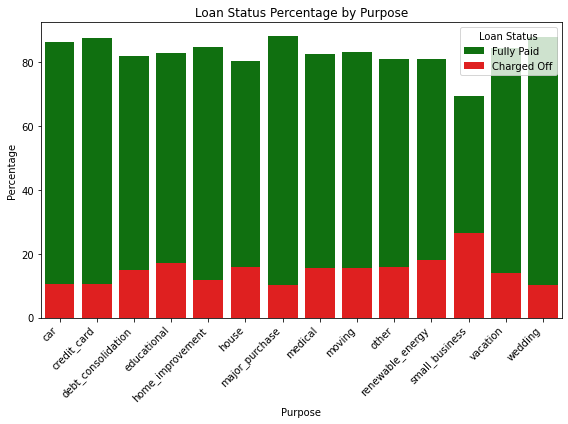

In [144]:
# Create a DataFrame with 'purpose' value counts
purpose_counts = loan_data['purpose'].value_counts().reset_index()
purpose_counts.columns = ['purpose', 'count']

# Calculate the percentage of loan_status counts for each purpose category
bivariate_data = loan_data.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)
bivariate_data = bivariate_data.div(bivariate_data.sum(axis=1), axis=0) * 100

# Create a Seaborn bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=bivariate_data.reset_index(), x='purpose', y='Fully Paid', label='Fully Paid', color='green')
sns.barplot(data=bivariate_data.reset_index(), x='purpose', y='Charged Off', label='Charged Off', color='red')
plt.title('Loan Status Percentage by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout()
plt.show()

__Result__:  
1. The defaulting percentage is highest for small business purpose

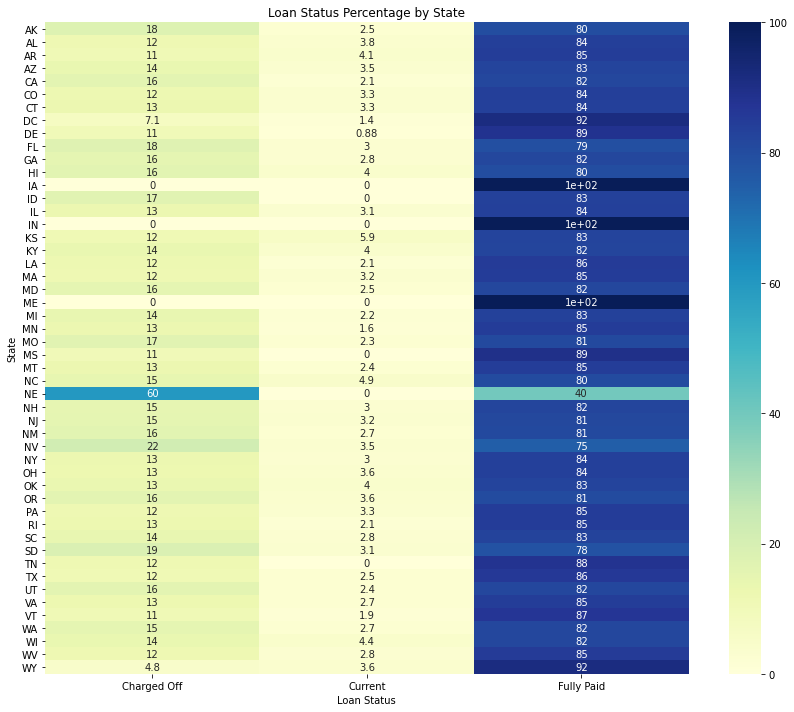

In [152]:
# Create a DataFrame with 'addr_state' value counts
state_counts = loan_data['addr_state'].value_counts().reset_index()
state_counts.columns = ['addr_state', 'count']

# Calculate the percentage of loan_status counts for each state category
bivariate_data = loan_data.groupby(['addr_state', 'loan_status']).size().unstack(fill_value=0)
bivariate_data = bivariate_data.div(bivariate_data.sum(axis=1), axis=0) * 100

# Create a Seaborn heat map
plt.figure(figsize=(12, 10))
sns.heatmap(bivariate_data, cmap="YlGnBu", annot=True)

# Customize the plot
plt.title('Loan Status Percentage by State')
plt.xlabel('Loan Status')
plt.ylabel('State')
plt.tight_layout()
plt.show()




__Result__:  
1. The maximum defaulters are from NE 

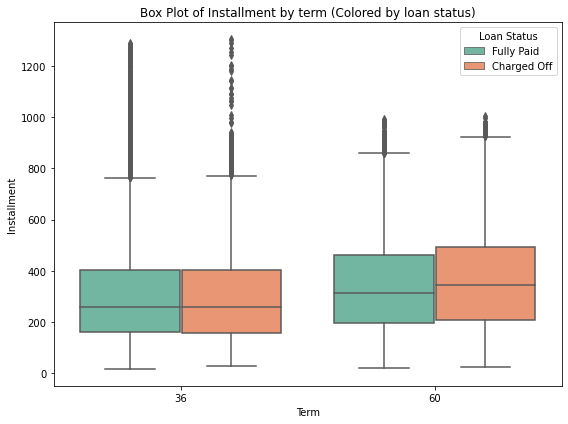

In [173]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=loan_data, x='term', y='installment', hue='loan_status', palette='Set2')
plt.title('Box Plot of Installment by term (Colored by loan status)')
plt.xlabel('Term')
plt.ylabel('Installment')
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout()
plt.show()


__Result__:  
1. The 75th quartile is greater for the defaulted burrowers with increased term and installments

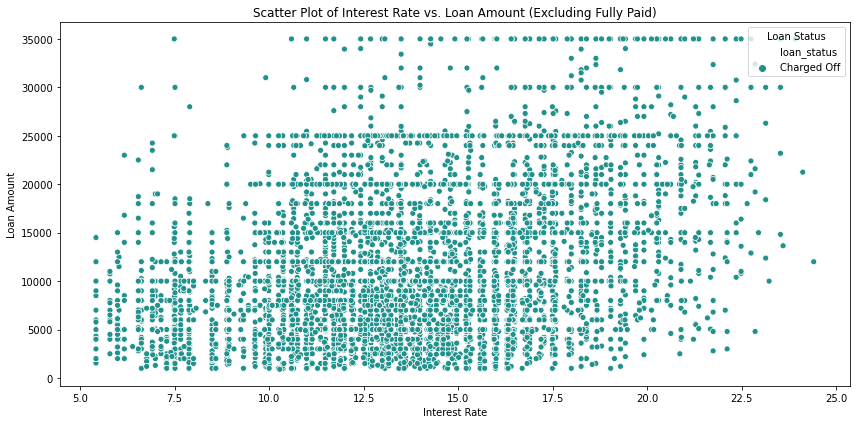

In [175]:
# Filter the data to exclude 'Fully Paid' loan statuses
filtered_loan_data = loan_data[(loan_data['loan_status'] != 'Fully Paid') ]
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_loan_data, x='int_rate', y='loan_amnt', hue='loan_status', palette='viridis')
plt.title('Scatter Plot of Interest Rate vs. Loan Amount (Excluding Fully Paid)')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout()
plt.show()


__Result__:  
1. There is no visible pattern

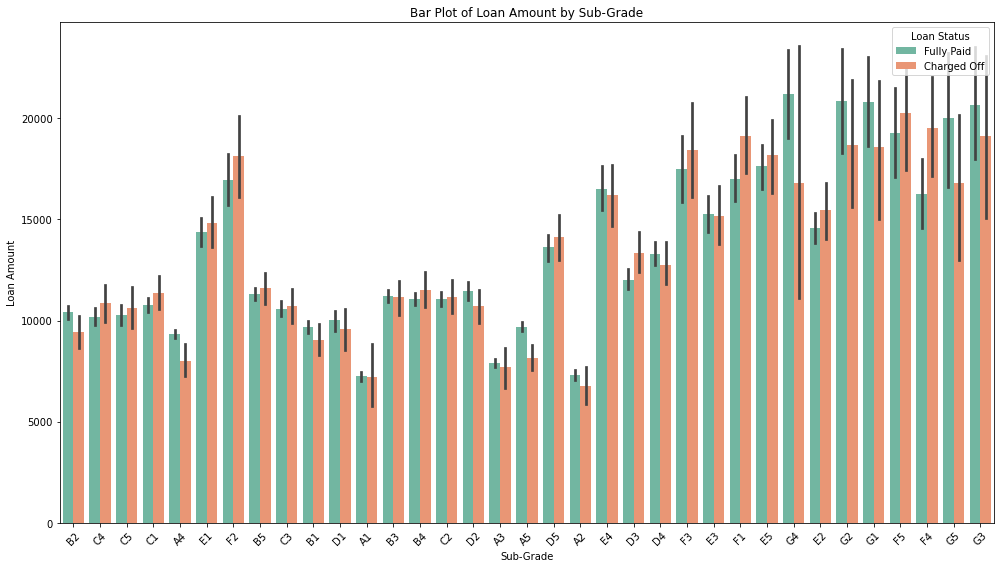

In [179]:
#plot for loan amount by sub-grade, clustered by loan status
plt.figure(figsize=(14, 8))
sns.barplot(data=loan_data, x='sub_grade', y='loan_amnt', hue='loan_status', palette='Set2')
plt.title('Bar Plot of Loan Amount by Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout()
plt.show()



__Result__:  
1. 

__Result__:  
1. The maximum defaulters are from NE 

__Result__:  
1. The maximum defaulters are from NE 

__Result__:  
1. The maximum defaulters are from NE 

__Result__:  
1. The maximum defaulters are from NE 